In [38]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this code I am exploring how the data for every signle day for four years can be used to test the strategy which is to buy if the price is low and sell when the price is high based on the data for the last two consecuitve dates.
Adj price is the adjusted price which is the price based on the last day and is negative if the current day price is lower than the previous day and vice varsa

In [10]:
start = '2014-01-01'
end = '2018-01-01'

In [15]:
goog = data.DataReader('GOOG', 'yahoo', start, end)

In [16]:
print(goog)


                   High          Low         Open        Close     Volume  \
Date                                                                        
2014-01-02   556.788025   552.060730   555.647278   554.481689  3656454.0   
2014-01-03   556.379578   550.401978   555.418152   550.436829  3345894.0   
2014-01-06   557.340942   551.154114   554.426880   556.573853  3551864.0   
2014-01-07   567.717041   558.486633   560.399475   567.303589  5124336.0   
2014-01-08   571.517822   564.528992   570.860291   568.484192  4501811.0   
...                 ...          ...          ...          ...        ...   
2017-12-22  1064.199951  1059.439941  1061.109985  1060.119995   755100.0   
2017-12-26  1060.119995  1050.199951  1058.069946  1056.739990   760600.0   
2017-12-27  1058.369995  1048.050049  1057.390015  1049.369995  1271900.0   
2017-12-28  1054.750000  1044.770020  1051.599976  1048.140015   837100.0   
2017-12-29  1049.699951  1044.900024  1046.719971  1046.400024   887500.0   

In [17]:
goog_data_signal = pd.DataFrame(index=goog.index)

In [21]:
goog_data_signal['price'] = goog['Adj Close']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
print(goog_data_signal)

                  price  daily_difference
Date                                     
2014-01-02   554.481689               NaN
2014-01-03   550.436829         -4.044861
2014-01-06   556.573853          6.137024
2014-01-07   567.303589         10.729736
2014-01-08   568.484192          1.180603
...                 ...               ...
2017-12-22  1060.119995         -3.510010
2017-12-26  1056.739990         -3.380005
2017-12-27  1049.369995         -7.369995
2017-12-28  1048.140015         -1.229980
2017-12-29  1046.400024         -1.739990

[1007 rows x 2 columns]


In [35]:
goog_data_signal['signal'] = 0.0

goog_data_signal['signal'] = np.where(goog_data_signal['daily_difference']
> 0, 1.0, 0.0)
print(goog_data_signal)

                  price  daily_difference  signal
Date                                             
2014-01-02   554.481689               NaN     0.0
2014-01-03   550.436829         -4.044861     0.0
2014-01-06   556.573853          6.137024     1.0
2014-01-07   567.303589         10.729736     1.0
2014-01-08   568.484192          1.180603     1.0
...                 ...               ...     ...
2017-12-22  1060.119995         -3.510010     0.0
2017-12-26  1056.739990         -3.380005     0.0
2017-12-27  1049.369995         -7.369995     0.0
2017-12-28  1048.140015         -1.229980     0.0
2017-12-29  1046.400024         -1.739990     0.0

[1007 rows x 3 columns]


In [37]:
goog_data_signal['positions'] = goog_data_signal['signal'].diff()
print(goog_data_signal)

                  price  daily_difference  signal  positions
Date                                                        
2014-01-02   554.481689               NaN     0.0        NaN
2014-01-03   550.436829         -4.044861     0.0        0.0
2014-01-06   556.573853          6.137024     1.0        1.0
2014-01-07   567.303589         10.729736     1.0        0.0
2014-01-08   568.484192          1.180603     1.0        0.0
...                 ...               ...     ...        ...
2017-12-22  1060.119995         -3.510010     0.0        0.0
2017-12-26  1056.739990         -3.380005     0.0        0.0
2017-12-27  1049.369995         -7.369995     0.0        0.0
2017-12-28  1048.140015         -1.229980     0.0        0.0
2017-12-29  1046.400024         -1.739990     0.0        0.0

[1007 rows x 4 columns]


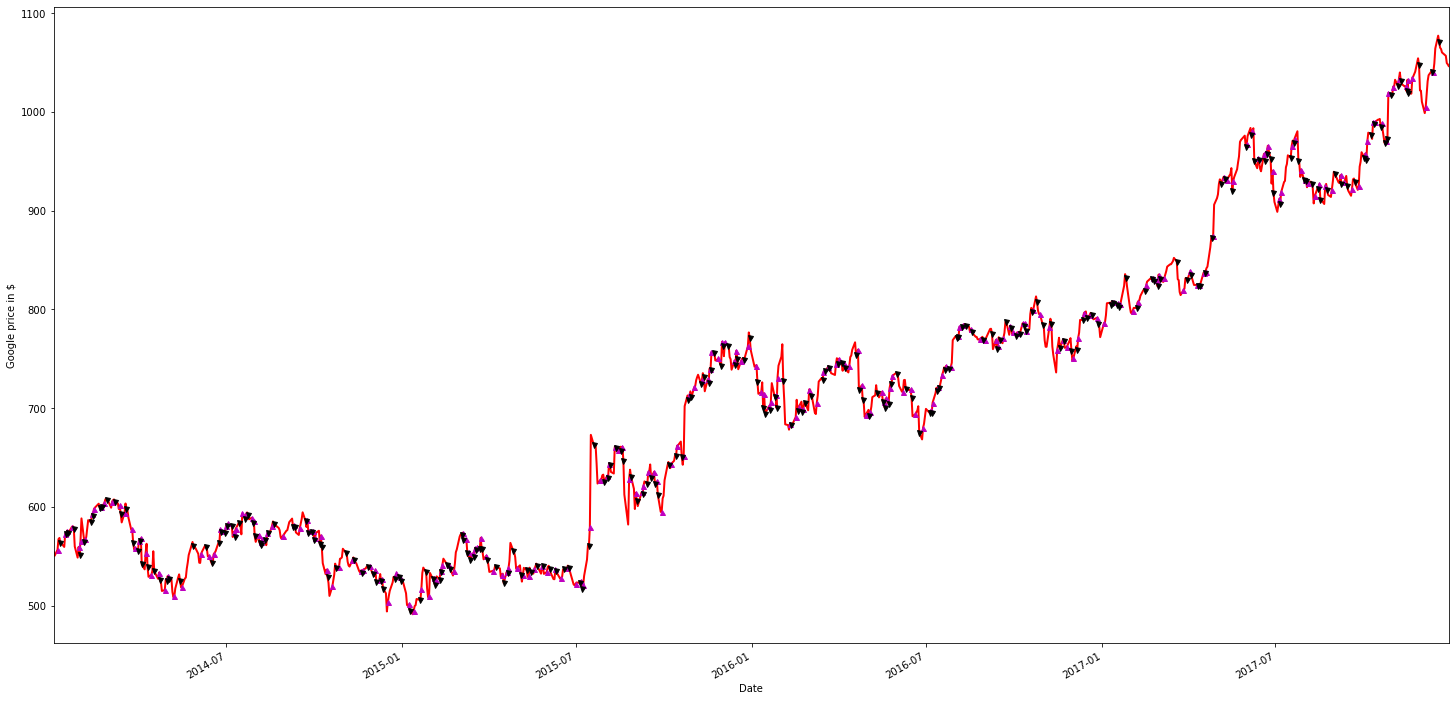

In [42]:
fig = plt.figure(figsize=(25,13))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(goog_data_signal.loc[goog_data_signal.positions ==
1.0].index,
goog_data_signal.price[goog_data_signal.positions == 1.0],
'^', markersize=5, color='m')
ax1.plot(goog_data_signal.loc[goog_data_signal.positions ==
-1.0].index,
goog_data_signal.price[goog_data_signal.positions == -1.0],
'v', markersize=5, color='k')
plt.show()

# Backtesting on a protfolio of 1000 USD.

In [50]:
initial_capital = float(1000.0)
positions = pd.DataFrame(index=goog_data_signal.index)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
positions

""
Date
2014-01-02
2014-01-03
2014-01-06
2014-01-07
2014-01-08
...
2017-12-22
2017-12-26
2017-12-27


In [58]:
positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'],
axis=0))
print(portfolio)
# positions

             positions         cash
Date                               
2014-01-02    0.000000          NaN
2014-01-03    0.000000  1000.000000
2014-01-06  556.573853   443.426147
2014-01-07  567.303589   443.426147
2014-01-08  568.484192   443.426147
...                ...          ...
2017-12-22    0.000000  1253.277466
2017-12-26    0.000000  1253.277466
2017-12-27    0.000000  1253.277466
2017-12-28    0.000000  1253.277466
2017-12-29    0.000000  1253.277466

[1007 rows x 2 columns]


In [56]:
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio
# this is the calcultion of the cash which is done by subtrating the price of the googole share from intitial capital of 1000usd.

,positions,cash
Date,,
2014-01-02,0.000000,NaN
2014-01-03,0.000000,1000.000000
2014-01-06,556.573853,443.426147
2014-01-07,567.303589,443.426147
2014-01-08,568.484192,443.426147
...,...,...
2017-12-22,0.000000,1253.277466
2017-12-26,0.000000,1253.277466
2017-12-27,0.000000,1253.277466


In [59]:
portfolio['total'] = portfolio['positions'] + portfolio['cash']

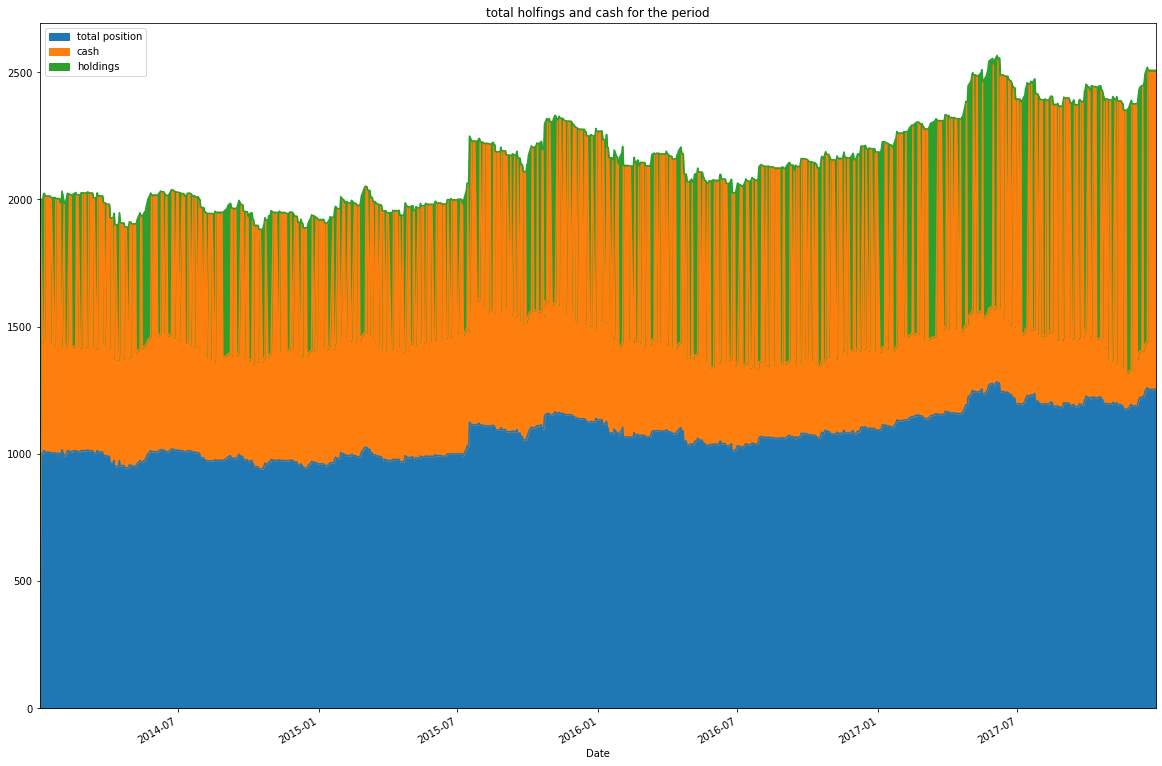

In [68]:
import pandas as pd 
my_dict={
'total position':portfolio['total'],
'cash':portfolio['cash'],
'holdings':portfolio['positions'],
   
}
df =pd.DataFrame(data=my_dict)
df.plot.area(figsize=(20,14), title='total holfings and cash for the period')
